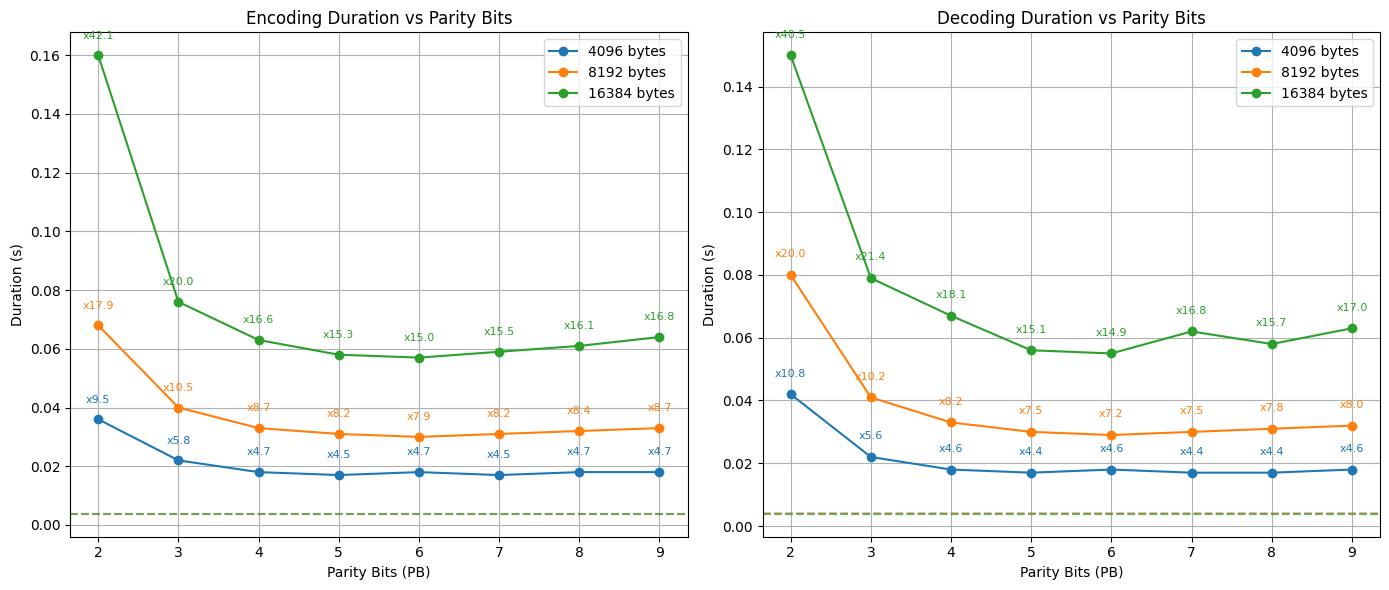

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data_enc = {
    "PB":    [0, 2, 3, 4, 5, 6, 7, 8, 9],
    "4096":  [0.0038, 0.036, 0.022, 0.018, 0.017, 0.018, 0.017, 0.018, 0.018],
    "8192":  [0.0038, 0.068, 0.040, 0.033, 0.031, 0.030, 0.031, 0.032, 0.033],
    "16384": [0.0038, 0.160, 0.076, 0.063, 0.058, 0.057, 0.059, 0.061, 0.064]
}

data_dec = {
    "PB":    [0, 2, 3, 4, 5, 6, 7, 8, 9],
    "4096":  [0.0039, 0.042, 0.022, 0.018, 0.017, 0.018, 0.017, 0.017, 0.018],
    "8192":  [0.004, 0.080, 0.041, 0.033, 0.030, 0.029, 0.030, 0.031, 0.032],
    "16384": [0.0037, 0.150, 0.079, 0.067, 0.056, 0.055, 0.062, 0.058, 0.063]
}

df_enc = pd.DataFrame(data_enc)
df_dec = pd.DataFrame(data_dec)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for size in ["4096", "8192", "16384"]:
    baseline = df_enc[size][0]
    plt.plot(df_enc["PB"][1:], df_enc[size][1:], marker="o", label=f"{size} bytes")
    plt.axhline(y=baseline, color=plt.gca().lines[-1].get_color(), linestyle="--", alpha=0.5)

    for pb, val in zip(df_enc["PB"][1:], df_enc[size][1:]):
        # plt.plot([pb, pb], [baseline, val], color=plt.gca().lines[-1].get_color(), linestyle=":", alpha=0.6)
        ratio = val / baseline
        plt.text(pb, val + .005, f"x{ratio:.1f}", ha="center", va="bottom", fontsize=8, color=plt.gca().lines[-1].get_color())

plt.title("Encoding Duration vs Parity Bits")
plt.xlabel("Parity Bits (PB)")
plt.ylabel("Duration (s)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for size in ["4096", "8192", "16384"]:
    baseline = df_dec[size][0]
    plt.plot(df_dec["PB"][1:], df_dec[size][1:], marker="o", label=f"{size} bytes")
    plt.axhline(y=baseline, color=plt.gca().lines[-1].get_color(), linestyle="--", alpha=0.5)

    for pb, val in zip(df_dec["PB"][1:], df_dec[size][1:]):
        # plt.plot([pb, pb], [baseline, val], color=plt.gca().lines[-1].get_color(), linestyle=":", alpha=0.6)
        ratio = val / baseline
        plt.text(pb, val + .005, f"x{ratio:.1f}", ha="center", va="bottom", fontsize=8, color=plt.gca().lines[-1].get_color())

plt.title("Decoding Duration vs Parity Bits")
plt.xlabel("Parity Bits (PB)")
plt.ylabel("Duration (s)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


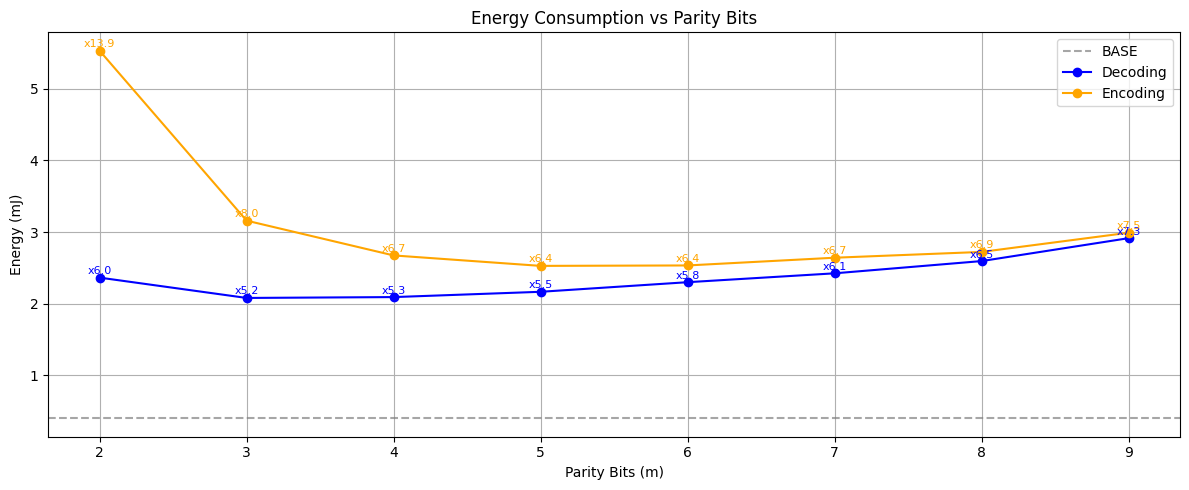

In [3]:
import matplotlib.pyplot as plt
import re

log_text = """
[BASE] Duration=1ms Energy=0.397mJ
[DECODING] m=2: Duration=100ms, Energy=2.363mJ
[DECODING] m=3: Duration=22ms, Energy=2.079mJ
[DECODING] m=4: Duration=22ms, Energy=2.091mJ
[DECODING] m=5: Duration=22ms, Energy=2.165mJ
[DECODING] m=6: Duration=22ms, Energy=2.299mJ
[DECODING] m=7: Duration=100ms, Energy=2.423mJ
[DECODING] m=8: Duration=101ms, Energy=2.594mJ
[DECODING] m=9: Duration=102ms, Energy=2.914mJ
[ENCODING] m=2: Duration=210ms, Energy=5.533mJ
[ENCODING] m=3: Duration=110ms, Energy=3.159mJ
[ENCODING] m=4: Duration=101ms, Energy=2.673mJ
[ENCODING] m=5: Duration=100ms, Energy=2.527mJ
[ENCODING] m=6: Duration=100ms, Energy=2.533mJ
[ENCODING] m=7: Duration=101ms, Energy=2.641mJ
[ENCODING] m=8: Duration=101ms, Energy=2.722mJ
[ENCODING] m=9: Duration=102ms, Energy=2.990mJ
"""

base_energy = float(re.search(r"\[BASE\].*Energy=([\d\.]+)mJ", log_text).group(1))
dec_data, enc_data = {}, {}

for line in log_text.splitlines():
    line = line.strip()
    if "[DECODING]" in line:
        m = int(re.search(r"m=(\d+)", line).group(1))
        energy = float(re.search(r"Energy=([\d\.]+)mJ", line).group(1))
        dec_data[m] = energy
    elif "[ENCODING]" in line:
        m = int(re.search(r"m=(\d+)", line).group(1))
        energy = float(re.search(r"Energy=([\d\.]+)mJ", line).group(1))
        enc_data[m] = energy

m_values = sorted(dec_data.keys())
dec_energies = [dec_data[m] for m in m_values]
enc_energies = [enc_data[m] for m in m_values]
sum_energies = [dec_data[m] + enc_data[m] for m in m_values]

plt.figure(figsize=(12, 5))
plt.axhline(y=base_energy, color='gray', linestyle='--', alpha=0.7, label='BASE')

plt.plot(m_values, dec_energies, marker='o', color='blue', label='Decoding')
plt.plot(m_values, enc_energies, marker='o', color='orange', label='Encoding')
# plt.plot(m_values, sum_energies, marker='o', color='green', label='Encoding + Decoding')

for m, val in zip(m_values, dec_energies):
    plt.text(m, val + 0.05, f"x{val/base_energy:.1f}", ha='center', fontsize=8, color='blue')

for m, val in zip(m_values, enc_energies):
    plt.text(m, val + 0.05, f"x{val/base_energy:.1f}", ha='center', fontsize=8, color='orange')

# for m, val in zip(m_values, sum_energies):
#     plt.text(m, val + 0.05, f"x{val/base_energy:.1f}", ha='center', fontsize=8, color='green')

plt.title("Energy Consumption vs Parity Bits")
plt.xlabel("Parity Bits (m)")
plt.ylabel("Energy (mJ)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

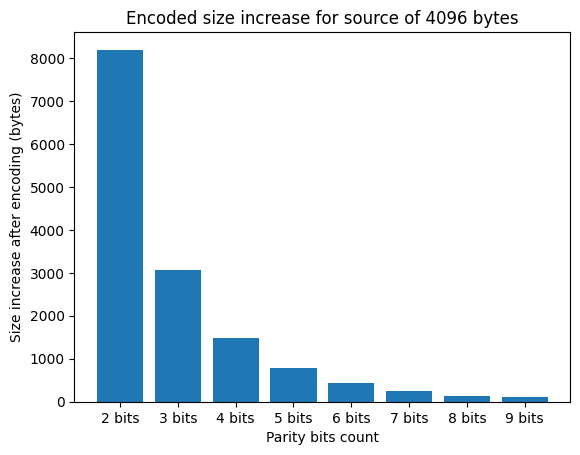

In [ ]:
import matplotlib.pyplot as plt

def calculate_encoded_size(dsize: int, m: int) -> int:
    n = (1 << m) - 1
    k = n - m
    blocks = (dsize * 8 + k - 1) // k
    return (blocks * n + 7) // 8

def encoded_sizes_for_parity_bits(dsize: int, parity_bits_list: list[int]) -> dict[int, int]:
    result = {}
    for m in parity_bits_list:
        result[m] = calculate_encoded_size(dsize, m)
    return result

def plot_encoded_size_increase(sizes: dict[int, int], decoded_size: int):
    parity_bits_list = list(sizes.keys())
    encoded_sizes = list(sizes.values())
    increases = [encoded - decoded_size for encoded in encoded_sizes]

    plt.bar([f"{m} bits" for m in parity_bits_list], increases)
    plt.xlabel("Parity bits count")
    plt.ylabel("Size increase after encoding (bytes)")
    plt.title(f"Encoded size increase for source of {decoded_size} bytes")
    plt.show()

parity_bits = [2, 3, 4, 5, 6, 7, 8, 9]
decoded_size = 4096
sizes = encoded_sizes_for_parity_bits(decoded_size, parity_bits)
plot_encoded_size_increase(sizes, decoded_size)

In [ ]:
sizes

{2: 12288, 3: 7168, 4: 5586, 5: 4887, 6: 4529, 7: 4350, 8: 4240, 9: 4216}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
data = {
    'PB_count': [2, 3, 4, 5, 6, 7, 8, 9],
    'WN_1':  [0.02951, 0.086304, 0.200775, 0.378723, 0.673615, 0.987946, 1.207062, 1.187225],
    'WN_2':  [0.120605, 0.330963, 0.730988, 1.316406, 2.012909, 2.382782, 2.351349, 2.217163],
    'WN_3':  [0.262268, 0.747009, 1.517548, 2.517822, 3.387817, 3.08398, 3.386292, 3.219299],
    'WN_4':  [0.465332, 1.296783, 2.512665, 3.889038, 4.769592, 4.681976, 4.363495, 4.231934],
    'WN_5':  [0.728973, 1.924622, 3.633087, 5.337158, 5.995239, 5.723999, 5.355652, 5.233734],
    'WN_6':  [1.029755, 2.742218, 4.910278, 6.713562, 7.152985, 6.709869, 6.35498, 6.253784],
    'WN_7':  [1.401398, 3.572754, 6.229462, 8.114929, 8.219849, 7.68808, 7.345245, 7.24295],
    'WN_8':  [1.813812, 4.563568, 7.599548, 9.395203, 9.26004, 8.692017, 8.322754, 8.253723],
    'WN_9':  [2.287872, 5.577454, 9.001892, 10.62262, 10.228149, 9.700928, 9.329773, 9.302246],
    'WN_10': [2.801636, 6.655701, 10.396423, 11.788574, 11.239471, 10.661041, 10.340088, 10.313934],
}

df = pd.DataFrame(data)
df.set_index('PB_count', inplace=True)
df.index.name = 'PB count'

df.columns = ['1%', '2%', '3%', '4%', '5%', '6%', '7%', '8%', '9%', '10%']
# df = df.iloc[1:]

In [ ]:
print(df)

                1%        2%        3%        4%        5%        6%  \
PB count                                                               
3         0.086304  0.330963  0.747009  1.296783  1.924622  2.742218   
4         0.200775  0.730988  1.517548  2.512665  3.633087  4.910278   
5         0.378723  1.316406  2.517822  3.889038  5.337158  6.713562   
6         0.673615  2.012909  3.387817  4.769592  5.995239  7.152985   
7         0.987946  2.382782  3.083980  4.681976  5.723999  6.709869   
8         1.207062  2.351349  3.386292  4.363495  5.355652  6.354980   
9         1.187225  2.217163  3.219299  4.231934  5.233734  6.253784   

                7%        8%         9%        10%  
PB count                                            
3         3.572754  4.563568   5.577454   6.655701  
4         6.229462  7.599548   9.001892  10.396423  
5         8.114929  9.395203  10.622620  11.788574  
6         8.219849  9.260040  10.228149  11.239471  
7         7.688080  8.692017   9.

In [ ]:
df = df.iloc[2:]

<Figure size 1400x800 with 0 Axes>

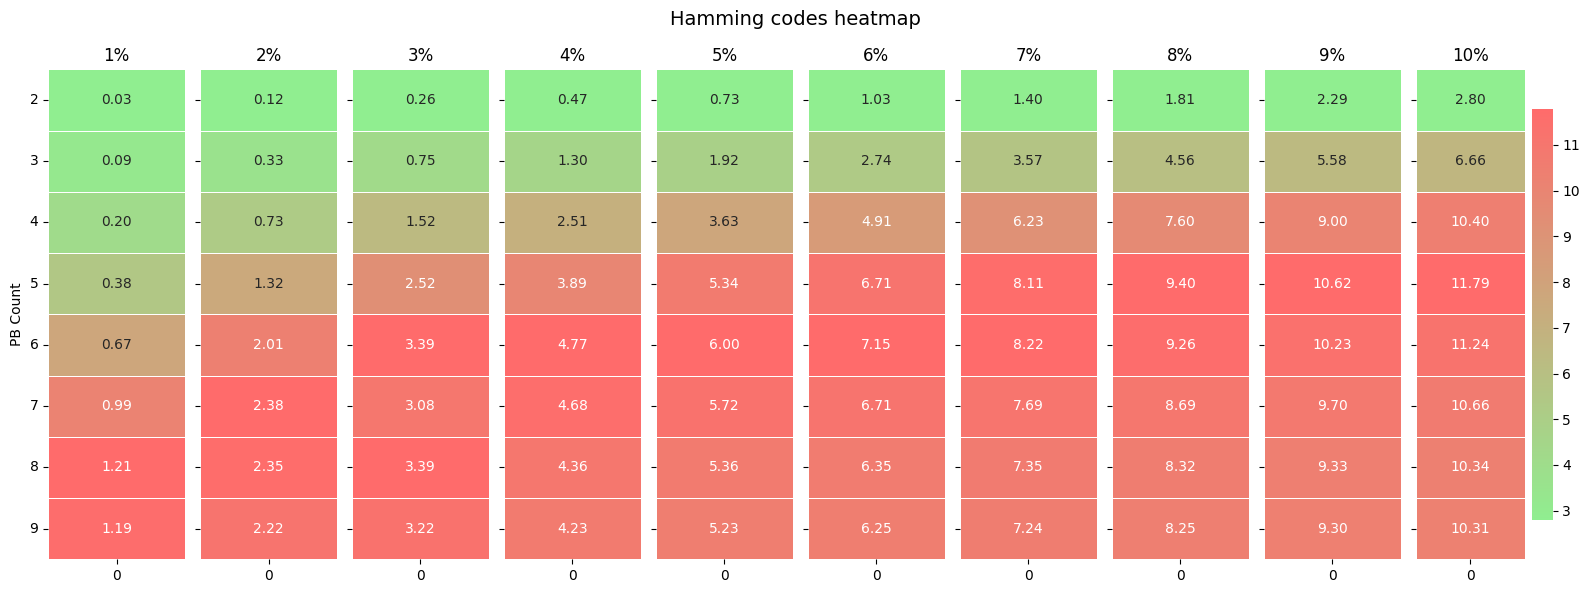

In [ ]:
plt.figure(figsize=(14, 8))

cmap = LinearSegmentedColormap.from_list('custom_green_red', ['#90EE90', '#FF6B6B'], N=256)

num_cols = len(df.columns)

fig, axes = plt.subplots(1, num_cols, figsize=(16, 6), sharey=True)
fig.suptitle('Hamming codes heatmap', fontsize=14)

for i, col in enumerate(df.columns):
    col_data = df[col].values.reshape(-1, 1)
    sns.heatmap(col_data,
                annot=True,
                fmt=".2f",
                cmap=cmap,
                cbar=True if i == num_cols-1 else False,
                ax=axes[i],
                linewidths=0.5,
                vmin=df[col].min(),
                vmax=df[col].max())

    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('PB Count' if i == 0 else '')
    axes[i].set_yticklabels(df.index, rotation=0)

plt.tight_layout()
plt.show()

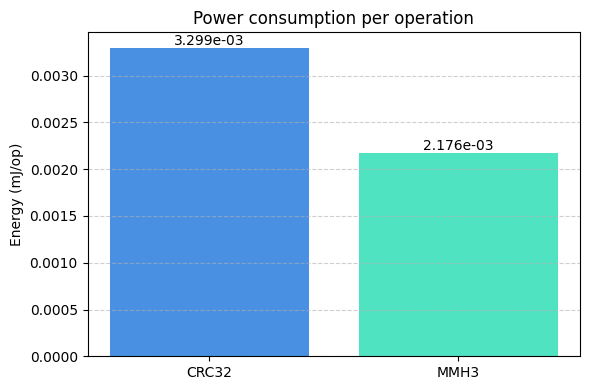

In [ ]:
import re
import matplotlib.pyplot as plt
import numpy as np

log_text = """
1100
[CRC32] Duration=1ms Energy=0.421mJ
1<count> - CRC32 testing
2<count> - MurMurHash3 testing
2100
[MMH3] Duration=1ms Energy=0.412mJ
1<count> - CRC32 testing
2<count> - MurMurHash3 testing
1100
[CRC32] Duration=1ms Energy=0.843mJ
1<count> - CRC32 testing
2<count> - MurMurHash3 testing
2100
[MMH3] Duration=1ms Energy=0.413mJ
1<count> - CRC32 testing
2<count> - MurMurHash3 testing
11000
[CRC32] Duration=1ms Energy=0.507mJ
1<count> - CRC32 testing
2<count> - MurMurHash3 testing
21000
[MMH3] Duration=1ms Energy=0.414mJ
1<count> - CRC32 testing
2<count> - MurMurHash3 testing
110000
[CRC32] Duration=1ms Energy=0.474mJ
1<count> - CRC32 testing
2<count> - MurMurHash3 testing
210000
[MMH3] Duration=1ms Energy=0.413mJ
1<count> - CRC32 testing
2<count> - MurMurHash3 testing
"""

pattern = re.compile(
    r"(?P<id>\d+)\n\[(?P<algo>[A-Z0-9]+)\].*?Energy=(?P<energy>[\d.]+)mJ"
)

data = {"CRC32": [], "MMH3": []}

for match in pattern.finditer(log_text):
    id_val = match.group("id")
    algo = match.group("algo")
    energy = float(match.group("energy"))
    count = int(id_val[1:])
    avg_energy = energy / count
    data[algo].append(avg_energy)

avg_values = {algo: np.mean(vals) for algo, vals in data.items()}

algos = list(avg_values.keys())
values = list(avg_values.values())

plt.figure(figsize=(6,4))
plt.bar(algos, values, color=['#4a90e2', '#50e3c2'])
plt.title("Power consumption per operation")
plt.ylabel("Energy (mJ/op)")
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, v in enumerate(values):
    plt.text(i, v, f"{v:.3e}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
